In [1]:
from google.colab import files
import pandas as pd

# Upload the datasets
uploaded = files.upload()

# Read the datasets into pandas DataFrames
twitter_training = pd.read_csv('twitter_training.csv')
twitter_validation = pd.read_csv('twitter_validation.csv')

# Display the first few rows of each dataset to verify
print("Twitter Training Dataset:")
print(twitter_training.head())

print("\nTwitter Validation Dataset:")
print(twitter_validation.head())

Saving twitter_training.csv to twitter_training (1).csv
Saving twitter_validation.csv to twitter_validation (1).csv
Twitter Training Dataset:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     

Twitter Validation Dataset:
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a ru

In [3]:
# Display column names of both datasets
print("Twitter Training Dataset Columns:")
print(twitter_training.columns)

print("\nTwitter Validation Dataset Columns:")
print(twitter_validation.columns)

Twitter Training Dataset Columns:
Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

Twitter Validation Dataset Columns:
Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


In [4]:
# Define the column names
columns = ['ID', 'Topic', 'Sentiment', 'Text']

# Reload the datasets with the specified column names
twitter_training = pd.read_csv('twitter_training.csv', header=None, names=columns)
twitter_validation = pd.read_csv('twitter_validation.csv', header=None, names=columns)

# Display the first few rows to verify
print("Twitter Training Dataset:")
print(twitter_training.head())

print("\nTwitter Validation Dataset:")
print(twitter_validation.head())

Twitter Training Dataset:
     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

Twitter Validation Dataset:
     ID      Topic   Sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                Text  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when

In [6]:
# Check for missing values in the 'Text' column
print("Missing values in Twitter Training Dataset 'Text' column:", twitter_training['Text'].isnull().sum())
print("Missing values in Twitter Validation Dataset 'Text' column:", twitter_validation['Text'].isnull().sum())

Missing values in Twitter Training Dataset 'Text' column: 686
Missing values in Twitter Validation Dataset 'Text' column: 0


In [7]:
# Fill missing values with an empty string
twitter_training['Text'] = twitter_training['Text'].fillna('')
twitter_validation['Text'] = twitter_validation['Text'].fillna('')

# Ensure all entries in the 'Text' column are strings
twitter_training['Text'] = twitter_training['Text'].astype(str)
twitter_validation['Text'] = twitter_validation['Text'].astype(str)

# Apply preprocessing to the 'Text' column
twitter_training['Text'] = twitter_training['Text'].apply(preprocess_text)
twitter_validation['Text'] = twitter_validation['Text'].apply(preprocess_text)

# Display the first few rows to verify preprocessing
print("Processed Twitter Training Dataset:")
print(twitter_training.head())

print("\nProcessed Twitter Validation Dataset:")
print(twitter_validation.head())

Processed Twitter Training Dataset:
     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you all  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

Processed Twitter Validation Dataset:
     ID      Topic   Sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                Text  
0  i mentioned on facebook that i was struggling ...  
1  bbc news amazon boss jeff bezos rejects claims...  
2  microsoft why do 

In [8]:
import re

# Function to clean and normalize text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and extra spaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert to lowercase
    text = text.lower()
    return text

# Apply preprocessing to the 'Text' column in both datasets
twitter_training['Text'] = twitter_training['Text'].apply(preprocess_text)
twitter_validation['Text'] = twitter_validation['Text'].apply(preprocess_text)

# Display the first few rows to verify preprocessing
print("Processed Twitter Training Dataset:")
print(twitter_training.head())

print("\nProcessed Twitter Validation Dataset:")
print(twitter_validation.head())

Processed Twitter Training Dataset:
     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you all  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

Processed Twitter Validation Dataset:
     ID      Topic   Sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                Text  
0  i mentioned on facebook that i was struggling ...  
1  bbc news amazon boss jeff bezos rejects claims...  
2  microsoft why do 

In [9]:
# Summarize sentiment distribution in both datasets
print("Twitter Training Dataset Sentiment Distribution:")
print(twitter_training['Sentiment'].value_counts())

print("\nTwitter Validation Dataset Sentiment Distribution:")
print(twitter_validation['Sentiment'].value_counts())

Twitter Training Dataset Sentiment Distribution:
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

Twitter Validation Dataset Sentiment Distribution:
Sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64


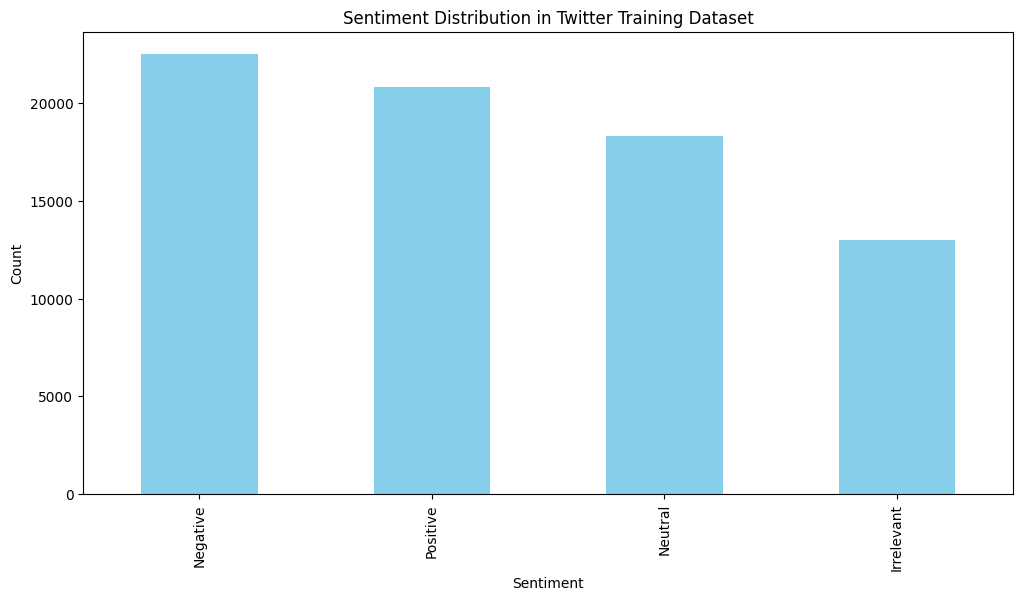

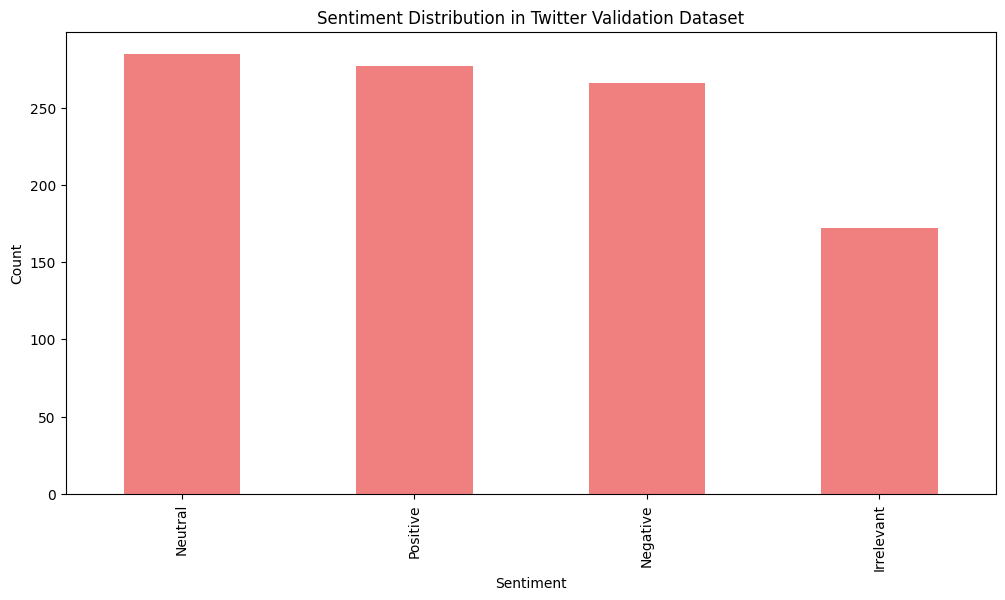

In [10]:
import matplotlib.pyplot as plt

# Plot sentiment distribution for Twitter Training Dataset
plt.figure(figsize=(12, 6))
twitter_training['Sentiment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution in Twitter Training Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot sentiment distribution for Twitter Validation Dataset
plt.figure(figsize=(12, 6))
twitter_validation['Sentiment'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Sentiment Distribution in Twitter Validation Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

# Split the Twitter Training dataset into features (X) and labels (y)
X_train = twitter_training['Text']
y_train = twitter_training['Sentiment']

# For simplicity, we'll use the entire Twitter Validation dataset as validation data
X_val = twitter_validation['Text']
y_val = twitter_validation['Sentiment']

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the validation data
X_val_vectorized = vectorizer.transform(X_val)

# Display the shape of the transformed data to verify
print("Shape of X_train_vectorized:", X_train_vectorized.shape)
print("Shape of X_val_vectorized:", X_val_vectorized.shape)

Shape of X_train_vectorized: (74682, 5000)
Shape of X_val_vectorized: (1000, 5000)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_vectorized, y_train)

# Predict on the validation set
y_pred = model.predict(X_val_vectorized)

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.80      0.73      0.76       172
    Negative       0.77      0.88      0.82       266
     Neutral       0.86      0.72      0.79       285
    Positive       0.79      0.86      0.82       277

    accuracy                           0.80      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.81      0.80      0.80      1000

Confusion Matrix:
[[125  17   8  22]
 [  5 235  11  15]
 [ 17  38 205  25]
 [ 10  16  13 238]]


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)

# Train the model
rf_model.fit(X_train_vectorized, y_train)

# Predict on the validation set
y_pred_rf = rf_model.predict(X_val_vectorized)

# Display classification report and confusion matrix for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.99      0.95      0.97       172
    Negative       0.94      0.98      0.96       266
     Neutral       0.96      0.95      0.96       285
    Positive       0.97      0.97      0.97       277

    accuracy                           0.96      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000

Random Forest Confusion Matrix:
[[164   1   3   4]
 [  0 260   4   2]
 [  1  11 272   1]
 [  1   4   4 268]]


In [15]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'sentiment_model.pkl')

['sentiment_model.pkl']

In [16]:
# Load the saved model
loaded_model = joblib.load('sentiment_model.pkl')

# Example new data
new_texts = ["I love playing Borderlands!", "The new update is awful."]
new_texts_vectorized = vectorizer.transform(new_texts)

# Predict sentiment
predictions = loaded_model.predict(new_texts_vectorized)
print(predictions)

['Positive' 'Negative']


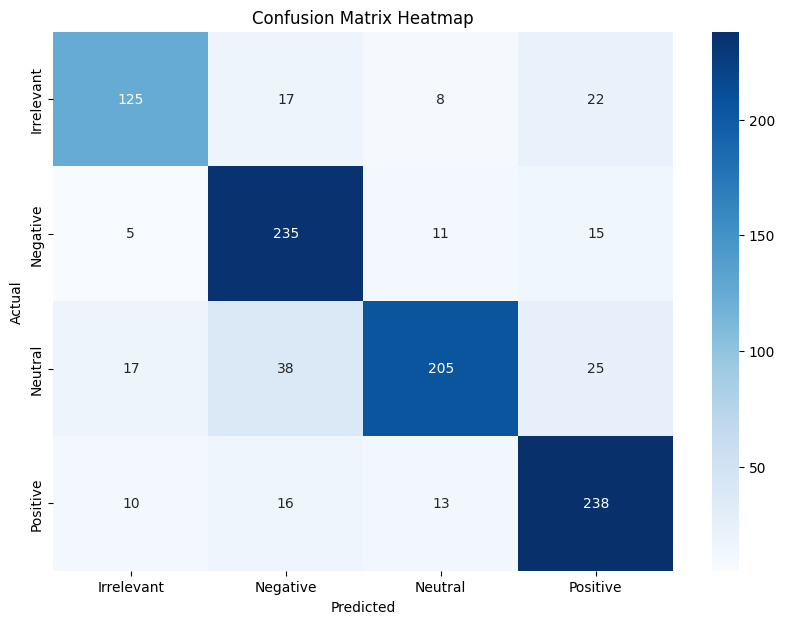

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

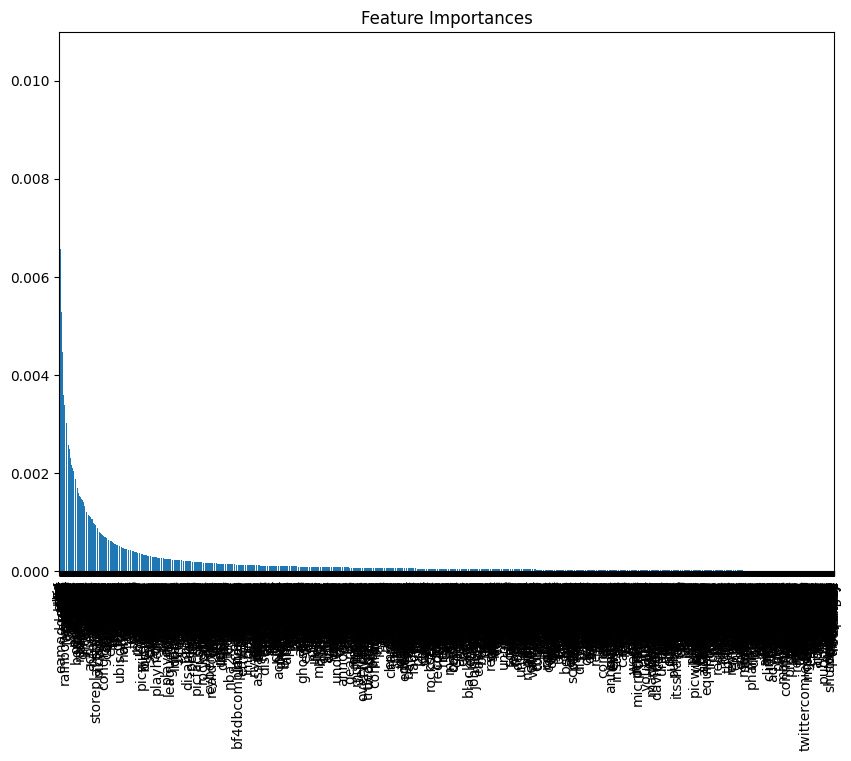

In [18]:
# Get feature importances from Random Forest
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 7))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), [vectorizer.get_feature_names_out()[i] for i in indices], rotation=90)
plt.xlim([-1, len(indices)])
plt.show()

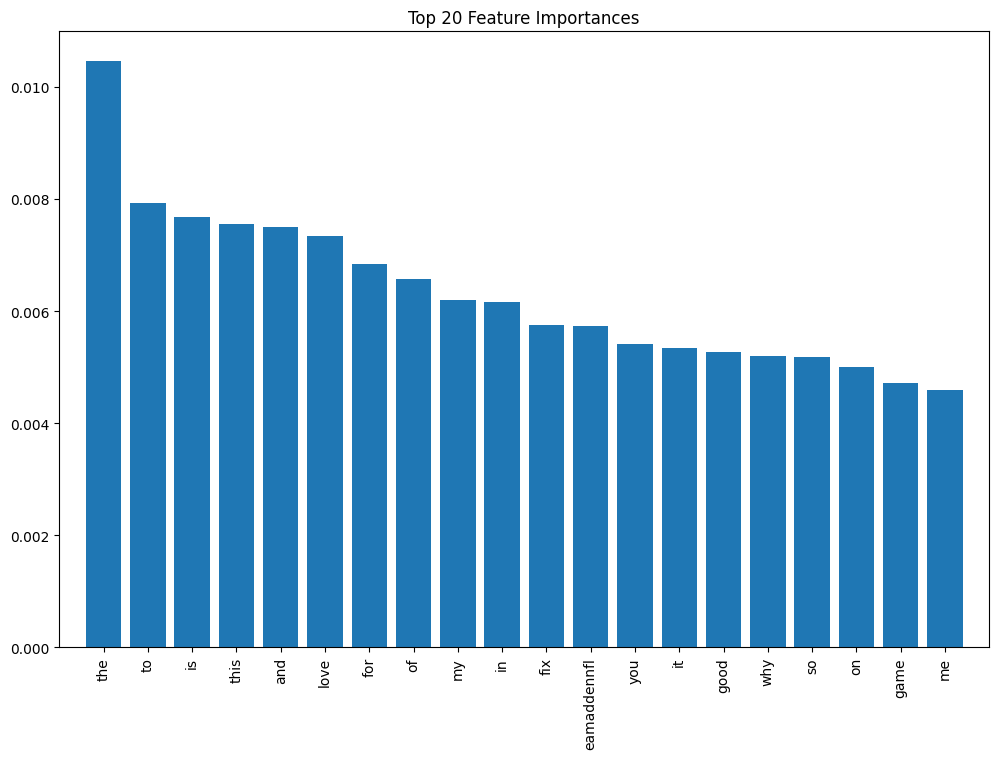

In [21]:
top_n = 20  # Number of top features to display
top_indices = indices[:top_n]

# Plot top N feature importances
plt.figure(figsize=(12, 8))
plt.title(f'Top {top_n} Feature Importances')
plt.bar(range(top_n), importances[top_indices], align='center')
plt.xticks(range(top_n), [vectorizer.get_feature_names_out()[i] for i in top_indices], rotation=90)
plt.xlim([-1, top_n])
plt.show()